In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df2 = df[['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]


In [5]:
df3 = df2.fillna(0)

In [6]:
df3.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [8]:
df3.mode()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Entire home/apt,40.71813,-73.95677,100.0,1.0,0.0,0.0,1.0,0.0
1,NaN,NaN,NaN,-73.95427,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df_full_train, df_test = train_test_split(df3, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [18]:

len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [21]:
df_train.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


In [45]:
train_above_average = (y_train >= 152).astype(int)

In [46]:
train_above_average.mean()

0.3058254081876129

In [47]:
train_above_average

array([0, 0, 0, ..., 1, 0, 0])

In [48]:
test_above_average = (y_test >= 152).astype(int)
val_above_average = (y_val >= 152).astype(int)

In [27]:
from sklearn.metrics import mutual_info_score

In [28]:
mutual_info_score(df_train.room_type, train_above_average)

0.14322617342090396

In [29]:
mutual_info_score(df_train.neighbourhood_group, train_above_average)

0.04650605348506435

In [30]:
from sklearn.feature_extraction import DictVectorizer

In [31]:
numerical = ['latitude', 'longitude', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [32]:
categorical=['neighbourhood_group','room_type']

In [33]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [34]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [36]:
z = np.linspace(-7, 7, 51)


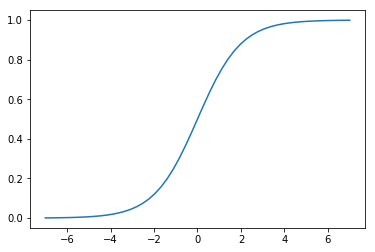

In [37]:
plt.plot(z, sigmoid(z))

In [38]:
from sklearn.linear_model import LogisticRegression


In [39]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

In [49]:
model.fit(X_train, train_above_average)

C:\Users\lakec\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

In [51]:
model.intercept_[0]


-0.002632219422314779

In [52]:
model.coef_[0].round(3)


array([ 0.003,  0.004, -0.228, -0.095, -0.012, -0.398,  0.08 ,  1.243,
       -0.797, -0.131, -0.003, -0.042,  1.63 , -1.161, -0.472])

In [53]:
y_pred = model.predict_proba(X_val)[:, 1]


In [54]:
above_average = (y_pred >= 0.5)

In [57]:
(val_above_average == above_average).mean()

0.7863789753553533

In [90]:
categorical = ['neighbourhood_group','room_type']

In [91]:
dv2 = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [92]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

In [93]:
model.fit(X_train, train_above_average)

C:\Users\lakec\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

In [94]:
y_pred = model.predict_proba(X_val)[:, 1]

In [95]:
above_average = (y_pred >= 0.5)

In [96]:
(val_above_average == above_average).mean()

0.7863789753553533

In [102]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [99]:
X = X_train

In [100]:
y = y_train

In [101]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [123]:
y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)
y_val = np.log1p(df_val.price.values)

AttributeError: 'DataFrame' object has no attribute 'price'

In [106]:
del df_train['price']
del df_val['price']
del df_test['price']

In [108]:
from sklearn.linear_model import Ridge

In [163]:
clf = Ridge(alpha=0.0)

In [164]:
clf.fit(X_train, y_train)

Ridge(alpha=0.0)

In [165]:
from sklearn.model_selection import RepeatedKFold


In [166]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [167]:
from sklearn.model_selection import cross_val_score


In [168]:
scores = cross_val_score(clf, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

In [169]:
scores.mean()

-0.5014331376020151

In [162]:
scores

array([-0.49427618, -0.51657459, -0.51989614, -0.51482777, -0.47762189,
       -0.49474496, -0.49687367, -0.50155835, -0.49809399, -0.50015645,
       -0.50654798, -0.51084371, -0.49404484, -0.48240629, -0.51035885,
       -0.47486015, -0.4975653 , -0.50847556, -0.50838787, -0.52033449,
       -0.5060508 , -0.51280944, -0.50010936, -0.50596649, -0.50804585,
       -0.52053927, -0.46572772, -0.48886559, -0.50134268, -0.50461299])